In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
set1=pd.read_csv('C:/YSPM/Machin_Learning_Project/PuneHousePrices/archive/Pune_house_data.csv')

In [3]:
set1.head(10)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
5,Super built-up Area,Ready To Move,2 BHK,DuenaTa,1170,2.0,1.0,38.00,Balaji Nagar
6,Super built-up Area,18-May,4 BHK,Jaades,2732,4.0,NaN,204.00,Baner
7,Super built-up Area,Ready To Move,4 BHK,Brway G,3300,4.0,NaN,600.00,Baner road
8,Super built-up Area,Ready To Move,3 BHK,NaN,1310,3.0,1.0,63.25,Bhandarkar Road
9,Plot Area,Ready To Move,6 Bedroom,NaN,1020,6.0,NaN,370.00,Bhavani Peth


In [4]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Cheek Null Values

In [5]:
set1.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [6]:
set1.groupby(['area_type'])['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2= set1.drop(['society', 'availability'], axis=1)

In [8]:
df2.head()

,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [9]:
df2.isnull().sum()

area_type          0
size              16
total_sqft         0
bath              73
balcony          609
price              0
site_location      1
dtype: int64

In [10]:
df2.groupby(['balcony'])['balcony'].count()

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [11]:
df2['balcony']

0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13320, dtype: float64

In [12]:
df2['balcony']=df2['balcony'].fillna(0)

In [13]:
df2.isna().sum()

area_type         0
size             16
total_sqft        0
bath             73
balcony           0
price             0
site_location     1
dtype: int64

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   size           13304 non-null  object 
 2   total_sqft     13320 non-null  object 
 3   bath           13247 non-null  float64
 4   balcony        13320 non-null  float64
 5   price          13320 non-null  float64
 6   site_location  13319 non-null  object 
dtypes: float64(3), object(4)
memory usage: 728.6+ KB


### To Remove Null Values

In [15]:
# df3=df2.dropna()

In [16]:
# df3.isna().sum()

In [17]:
def filler(A):
    import pandas as pd
    Q=pd.DataFrame(A.isna().sum(),columns=['ct'])
    W=Q[Q.ct>0].index
    for i in W:
        if A[i].dtypes=='object':
            X=A[i].mode()[0]
            A[i]=A[i].fillna(X)
        else:
            X=A[i].mean()
            A[i]=A[i].fillna(X)
            

In [18]:
filler(df2)
df3=df2

In [19]:
df3


,area_type,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...
13315,Built-up Area,5 Bedroom,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,4 BHK,3600,5.0,0.0,400.00,Paud Road
13317,Built-up Area,2 BHK,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,4 BHK,4689,4.0,1.0,488.00,Prabhat Road


In [20]:
#check columns unique one-by-one to clean data.
df3['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [21]:
#checking size column
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [22]:
#create new columns to only pic number from size.
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [23]:
df3.head()

,area_type,size,total_sqft,bath,balcony,price,site_location,bhk
0,Super built-up Area,2 BHK,1056,2.0,1.0,39.07,Alandi Road,2
1,Plot Area,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk,4
2,Built-up Area,3 BHK,1440,2.0,3.0,62.00,Anandnagar,3
3,Super built-up Area,3 BHK,1521,3.0,1.0,95.00,Aundh,3
4,Super built-up Area,2 BHK,1200,2.0,1.0,51.00,Aundh Road,2


In [24]:
df3[df3.bhk>15]


,area_type,size,total_sqft,bath,balcony,price,site_location,bhk
1718,Super built-up Area,27 BHK,8000,27.0,0.0,230.0,Uruli Devachi,27
3379,Super built-up Area,19 BHK,2000,16.0,0.0,490.0,Dehu Road,19
3609,Super built-up Area,16 BHK,10000,16.0,0.0,550.0,Model colony,16
4684,Plot Area,43 Bedroom,2400,40.0,0.0,660.0,Salunke Vihar,43
11559,Plot Area,18 Bedroom,1200,18.0,0.0,200.0,Karve Road,18


In [25]:
df4 = df3.drop('size', axis='columns')


In [26]:
#checking total_sqft columns for cleaning.
df4['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [27]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [28]:
df4[~df4['total_sqft'].apply(is_float)]

,area_type,total_sqft,bath,balcony,price,site_location,bhk
30,Super built-up Area,2100 - 2850,4.00000,0.0,186.000,Gultekdi,4
56,Built-up Area,3010 - 3410,2.69261,0.0,192.000,Model colony,4
81,Built-up Area,2957 - 3450,2.69261,0.0,224.500,Shukrawar Peth,4
122,Super built-up Area,3067 - 8156,4.00000,0.0,477.000,Ganeshkhind,4
137,Super built-up Area,1042 - 1105,2.00000,0.0,54.005,Khadaki,2
...,...,...,...,...,...,...,...
12990,Super built-up Area,1804 - 2273,3.00000,0.0,122.000,Gokhale Nagar,3
13059,Super built-up Area,1200 - 1470,2.00000,0.0,72.760,Anandnagar,2
13240,Super built-up Area,1020 - 1130,2.69261,0.0,52.570,Vadgaon Budruk,1
13265,Super built-up Area,1133 - 1384,2.00000,0.0,59.135,Dapodi,2


In [29]:
#convert those to numbers
def float_sqrt_to_num(x):
    a = x.split('-')
    if len(a)==2:
        return(float(a[0])+float(a[1]))/2
    try:
        return float(x)
    except:
        return None

In [30]:
float_sqrt_to_num('2548-2825')


2686.5

In [31]:
float_sqrt_to_num('2548')

2548.0

In [32]:
float_sqrt_to_num('34.46Sq. Meter')

In [33]:
df5=df4.copy()
df5['total_sqft']=df4['total_sqft'].apply(float_sqrt_to_num)

In [34]:
df5

,area_type,total_sqft,bath,balcony,price,site_location,bhk
0,Super built-up Area,1056.0,2.0,1.0,39.07,Alandi Road,2
1,Plot Area,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4
2,Built-up Area,1440.0,2.0,3.0,62.00,Anandnagar,3
3,Super built-up Area,1521.0,3.0,1.0,95.00,Aundh,3
4,Super built-up Area,1200.0,2.0,1.0,51.00,Aundh Road,2
...,...,...,...,...,...,...,...
13315,Built-up Area,3453.0,4.0,0.0,231.00,Pashan,5
13316,Super built-up Area,3600.0,5.0,0.0,400.00,Paud Road,4
13317,Built-up Area,1141.0,2.0,1.0,60.00,Pirangut,2
13318,Super built-up Area,4689.0,4.0,1.0,488.00,Prabhat Road,4


In [35]:
df5.loc[410]

area_type        Super built-up  Area
total_sqft                        NaN
bath                              1.0
balcony                           0.0
price                            18.5
site_location             Ganeshkhind
bhk                                 1
Name: 410, dtype: object

In [36]:
df5.isna().sum()

area_type         0
total_sqft       46
bath              0
balcony           0
price             0
site_location     0
bhk               0
dtype: int64

In [37]:
df6=df5.dropna()

In [38]:
df6['price_per_sqft'] = df6['price']*100000 / df6['total_sqft']
df6.head(10)

,area_type,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
0,Super built-up Area,1056.0,2.0,1.0,39.07,Alandi Road,2,3699.810606
1,Plot Area,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4,4615.384615
2,Built-up Area,1440.0,2.0,3.0,62.00,Anandnagar,3,4305.555556
3,Super built-up Area,1521.0,3.0,1.0,95.00,Aundh,3,6245.890861
4,Super built-up Area,1200.0,2.0,1.0,51.00,Aundh Road,2,4250.000000
5,Super built-up Area,1170.0,2.0,1.0,38.00,Balaji Nagar,2,3247.863248
6,Super built-up Area,2732.0,4.0,0.0,204.00,Baner,4,7467.057101
7,Super built-up Area,3300.0,4.0,0.0,600.00,Baner road,4,18181.818182
8,Super built-up Area,1310.0,3.0,1.0,63.25,Bhandarkar Road,3,4828.244275
9,Plot Area,1020.0,6.0,0.0,370.00,Bhavani Peth,6,36274.509804


<AxesSubplot:xlabel='bhk', ylabel='total_sqft'>

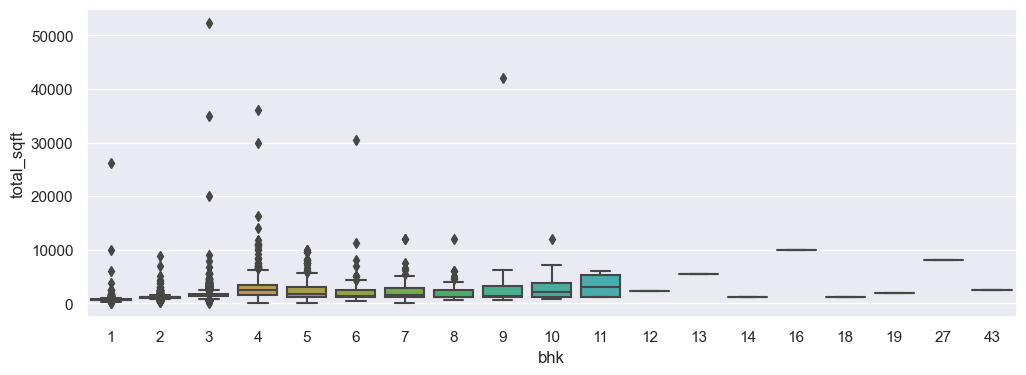

In [39]:
sb.set(rc={'figure.figsize':(12,4)})
sb.boxplot(x='bhk',y='total_sqft',data=df6)

In [40]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)]


In [41]:
df7

,area_type,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
0,Super built-up Area,1056.0,2.0,1.0,39.07,Alandi Road,2,3699.810606
1,Plot Area,2600.0,5.0,3.0,120.00,Ambegaon Budruk,4,4615.384615
2,Built-up Area,1440.0,2.0,3.0,62.00,Anandnagar,3,4305.555556
3,Super built-up Area,1521.0,3.0,1.0,95.00,Aundh,3,6245.890861
4,Super built-up Area,1200.0,2.0,1.0,51.00,Aundh Road,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Built-up Area,3453.0,4.0,0.0,231.00,Pashan,5,6689.834926
13316,Super built-up Area,3600.0,5.0,0.0,400.00,Paud Road,4,11111.111111
13317,Built-up Area,1141.0,2.0,1.0,60.00,Pirangut,2,5258.545136
13318,Super built-up Area,4689.0,4.0,1.0,488.00,Prabhat Road,4,10407.336319


<AxesSubplot:xlabel='total_sqft', ylabel='Density'>

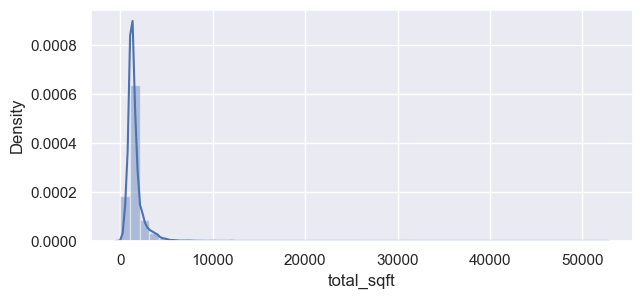

In [42]:
sb.set(rc={'figure.figsize':(7,3)})
sb.distplot(df6['total_sqft'])

<AxesSubplot:xlabel='bhk', ylabel='Density'>

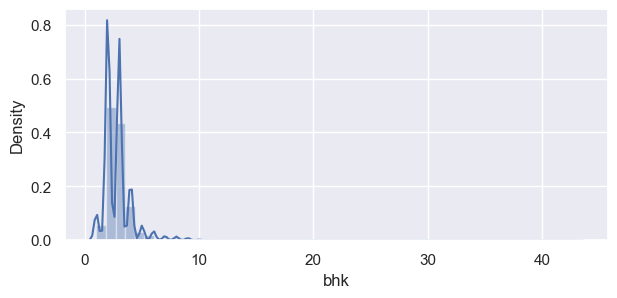

In [43]:
sb.distplot(df6.bhk)

In [44]:
df7 = df6[~(df6.total_sqft/df6.bhk<300)]

In [45]:
df7.shape

(12530, 8)

In [46]:
df7.price_per_sqft.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df8 = remove_pps_outliers(df7)
df8.shape

(10945, 8)

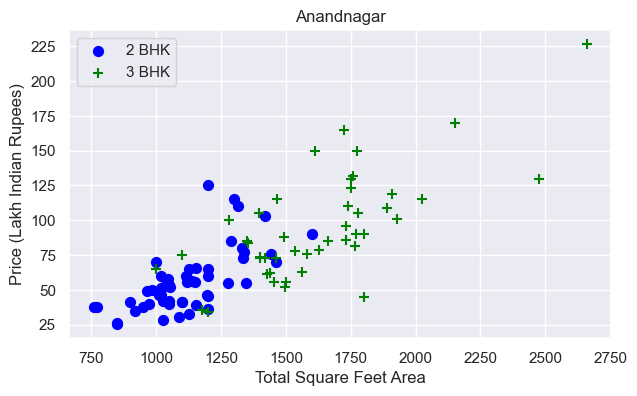

In [48]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (7,4)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Anandnagar")
#some house price have 3 bhk there prices are less 2 bhk house.

In [49]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis ='index')

df9 = remove_bhk_outliers(df8)
df9.shape

(7466, 8)

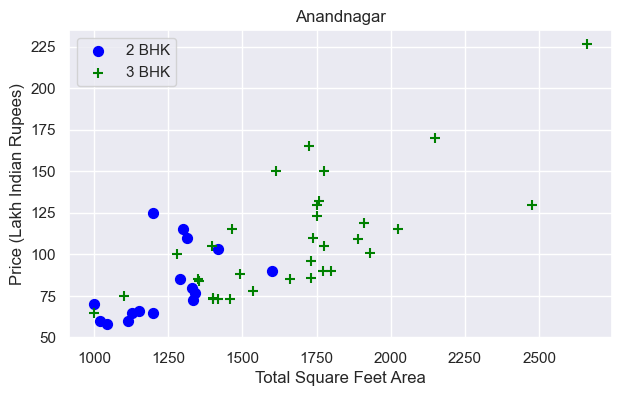

In [50]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.site_location==location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==location) & (df.bhk==3)]
    plt.rcParams['figure.figsize'] = (7,4)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df9,"Anandnagar")
#some outliers are removed.

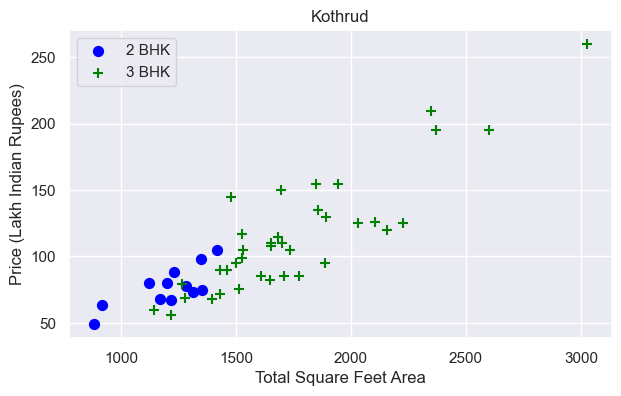

In [51]:
plot_scatter_chart(df9,"Kothrud")
#some outliers are removed.

Text(0, 0.5, 'Count')

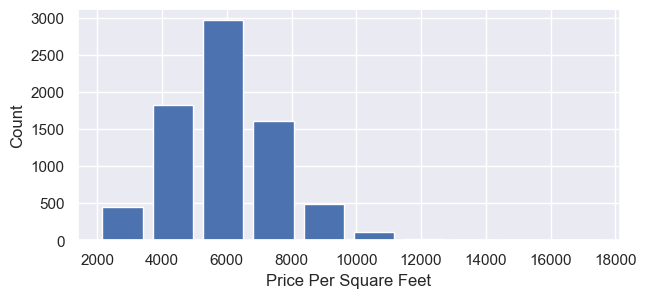

In [52]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (7,3)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [53]:
df9.bath.unique()

array([ 2.        ,  4.        ,  3.        ,  5.        ,  9.        ,
        1.        ,  6.        ,  2.69260965,  7.        ,  8.        ,
       12.        , 13.        , 16.        ])

Text(0, 0.5, 'count')

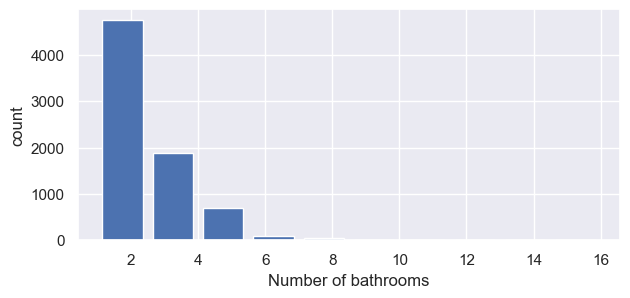

In [54]:
plt.hist(df9.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('count')

In [55]:
df9[df9.bath>10]


,area_type,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
1218,Super built-up Area,6000.0,12.0,0.0,150.0,Bibvewadi,11,2500.000000
2651,Super built-up Area,12000.0,12.0,0.0,525.0,Fatima Nagar,10,4375.000000
5295,Super built-up Area,5425.0,13.0,0.0,275.0,Kondhwa Khurd,13,5069.124424
6389,Super built-up Area,10000.0,16.0,0.0,550.0,Model colony,16,5500.000000
10445,Super built-up Area,4000.0,12.0,0.0,160.0,Wagholi,10,4000.000000


In [56]:

df9[df9.bath>df9.bhk+2]


,area_type,total_sqft,bath,balcony,price,site_location,bhk,price_per_sqft
777,Super built-up Area,1806.0,6.0,2.0,116.0,Baner,3,6423.034330
3086,Super built-up Area,11338.0,9.0,1.0,1000.0,Ghorpade Peth,6,8819.897689
4256,Built-up Area,7000.0,8.0,0.0,450.0,Karve Nagar,4,6428.571429


In [57]:
df10= df9[df9.bath<df9.bhk+2]

In [58]:
df10.shape

(7401, 8)

In [59]:
#all data are clear now.
#remove price_per_sqft.
df11 = df10.drop('price_per_sqft', axis='columns')
df11.head()
df11.isna().sum()

area_type        0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
bhk              0
dtype: int64

### One-hot coding

In [60]:
location_dummies = pd.get_dummies(df11.site_location)
location_dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
area_type_dummies = pd.get_dummies(df11.area_type)
area_type_dummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [62]:
df12 = pd.concat([df11, location_dummies.drop('Yerawada', axis='columns'), area_type_dummies.drop('Built-up  Area', axis='columns')], axis='columns')
df12.head()

,area_type,total_sqft,bath,balcony,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,...,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1056.0,2.0,1.0,39.07,Alandi Road,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Plot Area,2894.0,4.0,1.0,245.00,Alandi Road,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Super built-up Area,1084.0,2.0,2.0,50.00,Alandi Road,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Super built-up Area,1230.0,2.0,2.0,80.00,Alandi Road,2,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Super built-up Area,1750.0,3.0,2.0,130.00,Alandi Road,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
df13 = df12.drop(['site_location', 'area_type'], axis='columns')
df13.head()

,total_sqft,bath,balcony,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Carpet Area,Plot Area,Super built-up Area
0,1056.0,2.0,1.0,39.07,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2894.0,4.0,1.0,245.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1084.0,2.0,2.0,50.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1230.0,2.0,2.0,80.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1750.0,3.0,2.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Declaration Of X and  Y

In [64]:
Y=df13[['price']]
X=df13.drop('price',axis=1)

In [65]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=31)

In [66]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(ytrain,pred_tr)
ts_err=mean_absolute_error(ytest,pred_ts)
print(f"---==================----")
print(f"Training Error:{tr_err}")
print(f"Testing Error:{ts_err}")
if (tr_err<ts_err):
    print(f"Overfitted")
else:
    print(f"Underfitted")
print(f"---==================----")

---==================----
Training Error:16.928258283278947
Testing Error:17.760159268100914
Overfitted
---==================----


In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)
lm.score(xtest,ytest)

0.839676929213415

In [68]:
# Use K fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.90596067, 0.81449511, 0.78988104, 0.81563529, 0.87083885])

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.839362,{'normalize': True}
1,lasso,0.835550,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.781536,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [70]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       ...
       'Viman Nagar', 'Vishrant Wadi', 'Wadgaon Sheri', 'Wagholi',
       'Wakadewadi', 'Wanowrie', 'Warje', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'],
      dtype='object', length=102)

In [71]:
location='Ambegaon Budruk'
np.where(X.columns==location)[0][0]

5

In [72]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lm.predict([x])[0]


In [73]:
predict_price('Fatima Nagar',1000,1,1)

array([52.13539978])

In [74]:
predict_price('Kothrud',1000,2,2)

array([67.06625623])

In [75]:
predict_price('Kothrud',1000,3,3)

array([72.0779276])

In [76]:
set1['site_location'].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '